Step 1: determine base rate (same as 2021)

In [188]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
publications = pd.read_csv('data/AI publications by country in time.csv')
publications

,Year,Country,Value
0,1980,Albania,1.000000
1,1980,United Arab Emirates,12.450000
2,1980,Argentina,19.500000
3,1980,Australia,498.716667
4,1980,Azerbaijan,1.000000
...,...,...,...
5497,2021,Zambia,59.859525
5498,2021,Zimbabwe,165.467014
5499,2021,Turkmenistan,0.000000
5500,2021,Palestine,0.000000


In [6]:
publications[publications['Year']==2021].sort_values(by='Value', ascending=False)

,Year,Country,Value
5491,2021,United States,146834.596200
5392,2021,China,134083.068400
5406,2021,EU (27),125228.072300
5418,2021,India,44746.282380
5408,2021,United Kingdom,32393.614770
...,...,...,...
5433,2021,Liberia,0.278095
5416,2021,Haiti,0.200000
5499,2021,Turkmenistan,0.000000
5500,2021,Palestine,0.000000


In [26]:
breakout_countries = ['United States', 'China', 'United Kingdom', 'EU (27)']
def countries_of_interest(df):
    return df \
        .set_index('Country') \
        .groupby(by=lambda r: r if r in breakout_countries else 'None of the above') \
        .agg({'Year': 'first', 'Value': 'sum'}) \
        .reset_index() \
        .sort_values(by='Value', ascending=False)
    
countries_of_interest(publications[publications['Year']==2021])

,Country,Year,Value
2,None of the above,2021,258900.677466
4,United States,2021,146834.596200
0,China,2021,134083.068400
1,EU (27),2021,125228.072300
3,United Kingdom,2021,32393.614770


it doesn't really make sense to treat the rest of the world like one country. oops

We need a model for how this changes over time, so we can get a probability distribution for 2022. Let's look at the trends

Country
China             AxesSubplot(0.125,0.125;0.775x0.755)
EU (27)           AxesSubplot(0.125,0.125;0.775x0.755)
United Kingdom    AxesSubplot(0.125,0.125;0.775x0.755)
United States     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Value, dtype: object

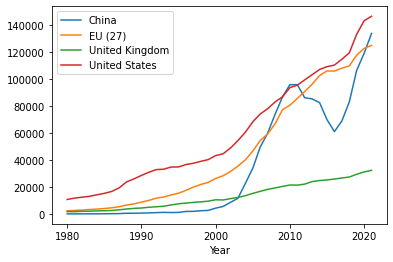

In [37]:
publications[publications['Country'].isin(breakout_countries)] \
    .set_index('Year') \
    .groupby('Country')['Value'] \
    .plot(legend=True)

looks linear within the last 5 years

Turns out I have no idea to get the probability of being in a particular rank out of a linear regression

In [55]:
by_country = pd.pivot_table(publications, index='Year', columns='Country', values='Value')
by_country

Country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Azerbaijan,Bahrain,Bangladesh,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Viet Nam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1980,0.000000,1.000000,0.000000,0.000000,19.500000,0.000000,498.716667,1.000000,1.500000,0.000000,...,12.450000,1708.472342,10746.88088,0.000000,0.000000,7.166667,0.000000,0.000000,2.000000,1.000000
1981,0.000000,0.000000,0.000000,0.500000,19.500000,2.000000,499.537121,0.000000,3.000000,2.300000,...,22.250000,1697.864286,11740.56502,0.000000,0.000000,7.250000,0.200000,0.000000,4.000000,1.500000
1982,0.000000,0.000000,1.000000,1.000000,13.066667,1.000000,542.394444,1.000000,7.375000,1.000000,...,20.250000,1955.949242,12438.06136,1.000000,1.000000,11.900000,0.000000,0.000000,0.000000,4.000000
1983,0.000000,0.000000,1.000000,0.000000,17.500000,1.000000,540.309524,0.000000,6.250000,1.000000,...,16.000000,2048.318040,13058.08083,3.000000,0.000000,10.500000,0.000000,1.333333,2.000000,6.166667
1984,0.000000,0.000000,0.000000,2.000000,25.883333,4.000000,556.416667,0.000000,3.000000,2.611111,...,21.500000,2253.234475,14208.50701,0.000000,0.000000,11.166667,0.000000,0.500000,1.000000,2.333333
1985,0.000000,1.000000,1.000000,0.000000,22.266667,2.000000,640.583333,0.000000,6.166667,5.750000,...,13.000000,2369.074025,15275.67753,1.000000,0.250000,10.000000,0.000000,0.000000,4.000000,2.000000
1986,0.000000,2.500000,1.500000,1.000000,19.916667,2.500000,711.175794,1.055556,2.200000,3.500000,...,5.500000,2566.061760,16699.13368,0.000000,0.000000,13.950000,0.000000,0.000000,0.000000,3.000000
1987,0.000000,0.500000,0.333333,0.250000,39.666667,2.500000,753.480952,0.000000,10.000000,3.800000,...,14.433333,3076.807275,19369.99320,1.666667,0.000000,6.716667,0.500000,0.000000,4.000000,1.000000
1988,0.000000,0.000000,1.500000,0.000000,37.535714,5.500000,920.344444,2.000000,5.500000,8.333333,...,25.019444,3656.889308,23815.98990,1.000000,0.000000,10.000000,0.000000,0.000000,0.500000,3.500000


In [64]:
country = 'United States'
X = by_country[country]
X

Year
1980     10746.88088
1981     11740.56502
1982     12438.06136
1983     13058.08083
1984     14208.50701
1985     15275.67753
1986     16699.13368
1987     19369.99320
1988     23815.98990
1989     26021.82820
1990     28601.99969
1991     30962.37516
1992     32917.68533
1993     33226.80323
1994     34853.24621
1995     34897.54204
1996     36682.26869
1997     37625.44060
1998     39046.95384
1999     40354.51496
2000     43310.00085
2001     44659.93447
2002     48936.80496
2003     54453.98529
2004     60691.04579
2005     68363.81990
2006     74223.13630
2007     78120.07506
2008     83101.01064
2009     86973.58754
2010     93824.75601
2011     95638.58289
2012     99572.67616
2013    103433.71690
2014    107275.43950
2015    109399.26130
2016    110537.91480
2017    114880.79780
2018    119557.69840
2019    133476.82060
2020    143455.63480
2021    146834.59620
Name: United States, dtype: float64

In [74]:
from statsmodels.tsa.forecasting.theta import ThetaModel
model = ThetaModel(X, deseasonalize=False)
results = model.fit()
results.prediction_intervals().join(results.forecast())

,lower,upper,forecast
2022,143501.163155,153389.149714,148445.156435


In [88]:
model = sm.tsa.SARIMAX(X)
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97616D+02    |proj g|=  9.28178D+02

At iterate    5    f=  1.89216D+01    |proj g|=  1.02974D+01

At iterate   10    f=  1.14783D+01    |proj g|=  4.92406D-01

At iterate   15    f=  1.05638D+01    |proj g|=  2.43606D-02

At iterate   20    f=  1.04418D+01    |proj g|=  1.02078D-03

At iterate   25    f=  9.95568D+00    |proj g|=  1.35112D-04
  ys=-6.361E-02  -gs= 2.565E-02 BFGS update SKIPPED

At iterate   30    f=  9.86515D+00    |proj g|=  2.74477D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

   

/home/jonah/.virtualenvs/infer-pub/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jonah/.virtualenvs/infer-pub/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jonah/.virtualenvs/infer-pub/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


In [113]:
forecast_results = results.get_forecast()
forecast_results.summary_frame()

/home/jonah/.virtualenvs/infer-pub/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


United States,mean,mean_se,mean_ci_lower,mean_ci_upper
42,146706.863101,4299.006461,138280.965267,155132.760934


let's try a simulation based approach

In [ ]:
def get_mean_se(ser):
    model = sm.tsa.SARIMAX(ser)
    results = model.fit()
    forecast_results = results.get_forecast()
    summary = forecast_results.summary_frame()
    return pd.Series({
        "mean": summary["mean"].iloc[0],
        "mean_se": summary["mean_se"].iloc[0]
    })

distributions = by_country.apply(get_mean_se)

In [124]:
distributions

Country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Azerbaijan,Bahrain,Bangladesh,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Viet Nam,Yemen,Zambia,Zimbabwe
mean,17.157973,51.567809,478.287325,9.388659,1390.661711,56.999004,16360.167816,88.606091,504.866718,2282.080339,...,1225.216115,32367.048652,146706.863101,160.212395,236.326211,174.328279,2029.497331,99.188749,59.327799,159.501758
mean_se,1.939283,10.057107,29.420796,3.040846,62.624912,7.030094,517.406202,10.348203,34.362851,125.227575,...,59.502388,922.830238,4299.006461,8.232789,23.385682,15.041121,120.130882,9.844843,4.982965,24.453966


In [181]:
samples = distributions.apply(lambda s: np.random.normal(s['mean'], s['mean_se'], 10000))
samples

Country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Azerbaijan,Bahrain,Bangladesh,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Viet Nam,Yemen,Zambia,Zimbabwe
0,17.015495,56.855039,503.744665,6.095522,1374.190744,48.010313,15758.852429,82.052773,532.176708,2245.586674,...,1224.238565,31382.747866,139380.097246,173.225845,225.166295,177.278831,1929.517579,89.748054,61.454570,170.782130
1,15.284365,41.473424,494.004761,7.171363,1398.896792,45.552360,15904.750122,69.556064,457.327071,2281.779985,...,1147.793998,31682.025301,150707.189765,156.050010,256.676296,166.265496,2001.391161,96.059986,57.719657,196.967071
2,13.947667,71.447684,432.339052,11.406424,1301.564333,57.835428,15323.651478,84.377521,505.142208,2501.014561,...,1282.003222,32647.186803,146056.189660,154.900953,242.869232,170.649675,1842.747941,107.354242,69.947812,162.984398
3,17.843930,50.978197,517.561777,4.992503,1390.718392,54.110998,16919.440986,93.762797,534.549837,2412.825381,...,1233.662135,33049.767495,146207.045115,157.496294,272.923954,173.031451,2069.488951,119.171751,59.764527,148.557980
4,16.706714,60.305015,456.709769,13.088509,1272.096700,57.277681,16973.282200,77.174076,460.403984,2436.966314,...,1241.914325,31216.622075,146414.311430,165.380923,262.473746,195.136532,1846.942965,95.387898,54.069453,103.053161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,16.039406,43.241000,478.671970,7.306668,1399.034107,63.623656,16554.538786,90.218437,512.863745,2258.217387,...,1259.259180,33116.647076,140886.054071,152.473205,253.411727,158.838094,2182.236225,100.156659,65.222692,159.139217
9996,17.091343,54.377786,512.837351,10.884151,1374.360191,59.220438,16420.353021,91.058087,534.654112,2427.391053,...,1158.430074,31812.917099,147588.845256,156.214365,239.991014,148.813376,1866.234341,95.969648,61.024852,157.695200
9997,17.346741,40.913282,452.387614,11.220806,1429.390360,68.622005,15700.301271,94.748625,537.102982,2347.080236,...,1191.085708,31855.919672,141282.284518,168.917550,222.398157,200.266007,1940.302610,100.311793,53.358568,124.537883
9998,16.981215,30.297577,555.297407,10.906395,1370.163302,58.796991,16804.868209,89.997472,503.882265,2342.444358,...,1259.167782,33434.363905,147451.943479,154.882884,227.759710,142.949872,1921.852626,91.439657,61.771228,131.518743


In [187]:
second_place = samples.apply(lambda s: s.sort_values(ascending=False).index[1], axis=1)
second_place

0               China
1               China
2               China
3       United States
4               China
            ...      
9995            China
9996            China
9997            China
9998            China
9999            China
Length: 10000, dtype: object

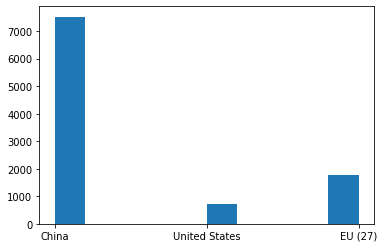

In [197]:
values, _, _ = plt.hist(second_place)

In [200]:
values /= np.sum(values)
values[np.nonzero(values)]

array([0.7522, 0.0723, 0.1755])